O presente código é baseado na abordagem feita pelo curso gratuito “Practical Deep Learning for Coders, v3”. (https://github.com/hiromis/notes/blob/master/Lesson2.md)



# Importações e Coleta de Imagens

In [ ]:
# Bibliotecas importantes que contém as funções necessárias
from fastai import *
from fastai.vision import *
import tensorflow as tf

In [ ]:
# Acesso ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cria as classes que usaremos
classes = ['covid', 'normal', 'pneumonia_bac', 'pneumonia_vir']
path = Path('/content/drive/My Drive/TCC/train')
path.ls()

[PosixPath('/content/drive/My Drive/TCC/train/pneumonia_bac'),
 PosixPath('/content/drive/My Drive/TCC/train/pneumonia_vir'),
 PosixPath('/content/drive/My Drive/TCC/train/covid'),
 PosixPath('/content/drive/My Drive/TCC/train/normal')]

# Verificação de Imagens Repetidas

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

covid


normal


pneumonia_bac


pneumonia_vir


# Construção do Modelo

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

Criação do Objeto ImageDataBunch

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, 
    train=".", 
    valid_pct=0.2,
    test="/content/drive/My Drive/TCC/test",
    ds_tfms=get_transforms(), 
    size=224,
    num_workers=4
    ).normalize(imagenet_stats)

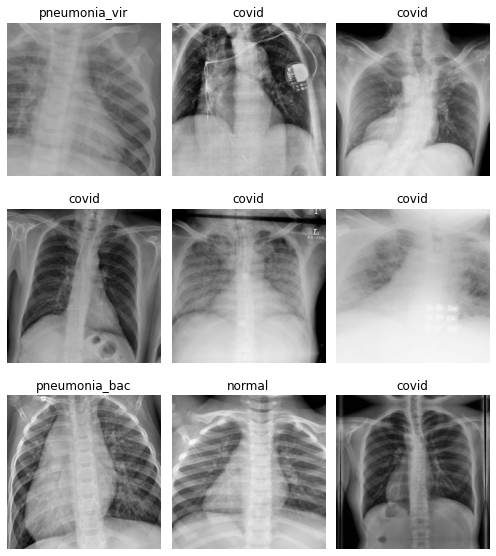

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['covid', 'normal', 'pneumonia_bac', 'pneumonia_vir'], 4, 1968, 492, 120)

# Treinamento do modelo

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [ ]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.401505,0.575506,0.770325,0.229675,00:40
1,0.902731,0.388266,0.888211,0.111789,00:39
2,0.663397,0.362583,0.888211,0.111789,00:39
3,0.558202,0.364655,0.896341,0.103659,00:39
4,0.470474,0.376172,0.898374,0.101626,00:39
5,0.398293,0.268130,0.918699,0.081301,00:40
6,0.366376,0.314320,0.900406,0.099593,00:39
7,0.338793,0.306564,0.902439,0.097561,00:40
8,0.298924,0.283021,0.906504,0.093496,00:39
9,0.280141,0.258350,0.920732,0.079268,00:39


# Interpretação dos resultados

RESULTADOS DE VALIDAÇÃO

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

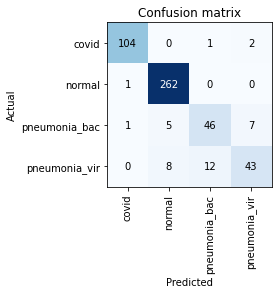

In [ ]:
interp.plot_confusion_matrix()

RESULTADOS DE TESTE

In [ ]:
# NÃO ESTAMOS CRIANDO OUTRO DATABUNCH PARA TESTES
np.random.seed(42)
data_test = ImageDataBunch.from_folder("/content/drive/My Drive/TCC/test", valid_pct=0, 
            ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats).split_none().label_from_folder()

In [ ]:
preds, a = learn.get_preds(ds_type=DatasetType.Test)
a = torch.argmax(preds, dim=1)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve
 
y_true = data_test.train.y.items
y_pred = a.numpy()
print ("Precision", precision_score(y_true, y_pred, average=None))
print ("Recall", recall_score(y_true, y_pred, average=None))
print ("f1_score", f1_score(y_true, y_pred, average=None))
print ("confusion_matrix")
print (confusion_matrix(y_true, y_pred))

Precision [0.935484 0.595745 0.857143 0.857143]
Recall [0.966667 0.933333 0.8      0.4     ]
f1_score [0.95082  0.727273 0.827586 0.545455]
confusion_matrix
[[29  1  0  0]
 [ 1 28  1  0]
 [ 0  4 24  2]
 [ 1 14  3 12]]
